In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
c_data=pd.read_csv('/Churn_Modelling.csv')

In [4]:
c_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [5]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [6]:
c_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
print(c_data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


# EDA

<Axes: xlabel='NumOfProducts', ylabel='EstimatedSalary'>

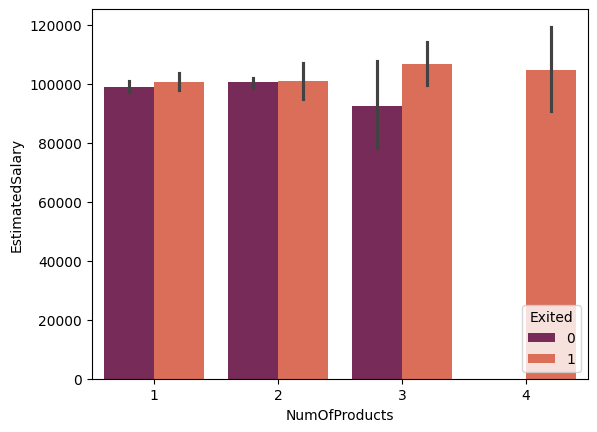

In [8]:
sns.barplot(data=c_data,x='NumOfProducts',y='EstimatedSalary',hue='Exited',palette="rocket")

This graph depicts the relation between the customer's estimated salary and the no.of products they hold with the bank. As we can see people who hold 4 or more products tend to churn almost all the time irrespective of salary range.

<Axes: xlabel='Tenure', ylabel='Balance'>

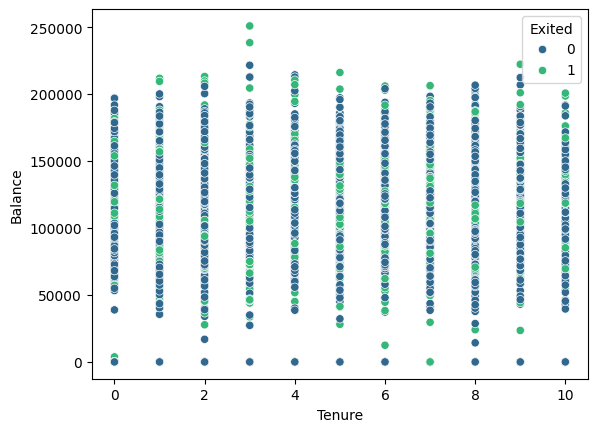

In [9]:
sns.scatterplot(data=c_data, x='Tenure', y='Balance', hue='Exited',palette="viridis")

The plot shows that both exited and non-exited customers are distributed across all tenure level with no clear trend but balance might have some influence on churn behavior if we visulaize further.

<Axes: xlabel='HasCrCard', ylabel='count'>

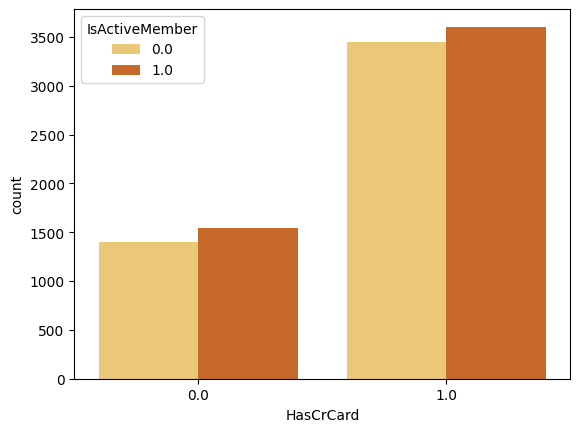

In [10]:
# sns.scatterplot(data=c_data, x='HasCrCard', y='IsActiveMember', hue='Exited',palette="viridis")
sns.countplot(x = c_data['HasCrCard'],hue = c_data['IsActiveMember'],palette='YlOrBr')

This plot depicts that although the difference between the churned or not churn is less in people who have a credit card there is a large difference in churners between those who own and do not own a credit card which could possibly indicate issues with credit card services.

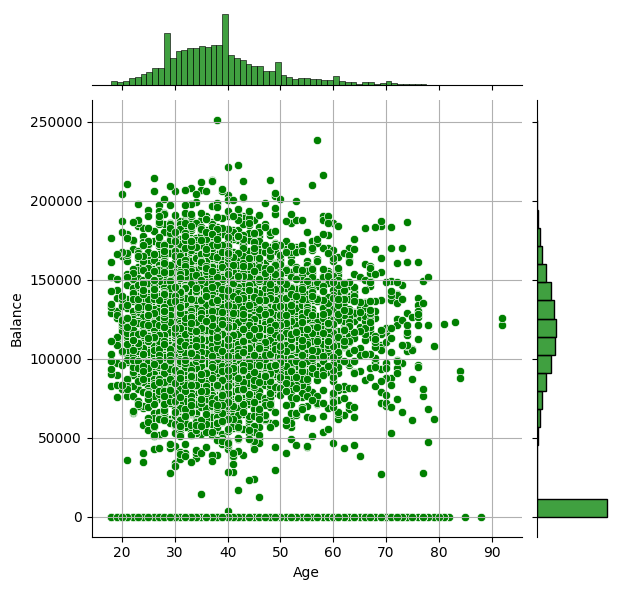

In [11]:
sns.jointplot(x=c_data['Age'],y=c_data['Balance'],kind='scatter',color="green")
plt.grid()

**The plot shows a positive correlation between age and balance, with some outliers and a majority of data points clustered between 100,000 and 200,000 balance.**

<Axes: xlabel='Exited', ylabel='count'>

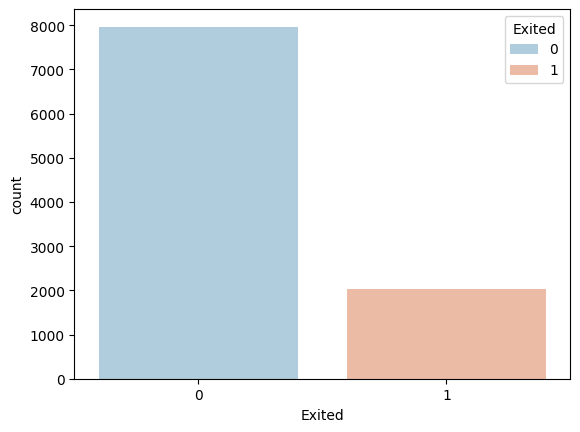

In [12]:
sns.countplot(x = c_data['Exited'],hue = c_data['Exited'],palette='RdBu_r')

**The plot shows that the majority of customers (around 80%) have not exited, while a smaller portion (around 20%) have exited.**

<Axes: xlabel='Gender', ylabel='count'>

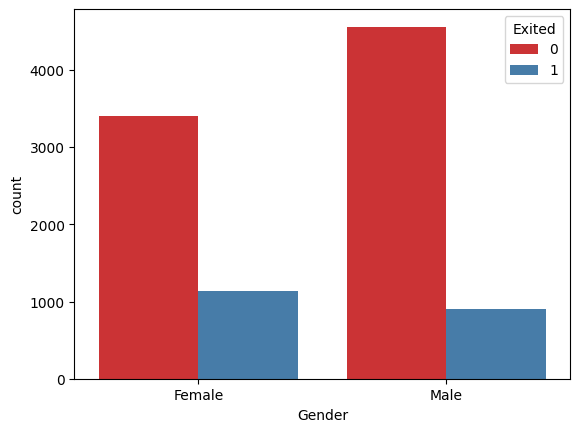

In [13]:
sns.countplot(x='Gender',data=c_data,hue='Exited',palette='Set1')

**There is a slight gender difference in churn, with females showing a marginally higher tendency to exit.**

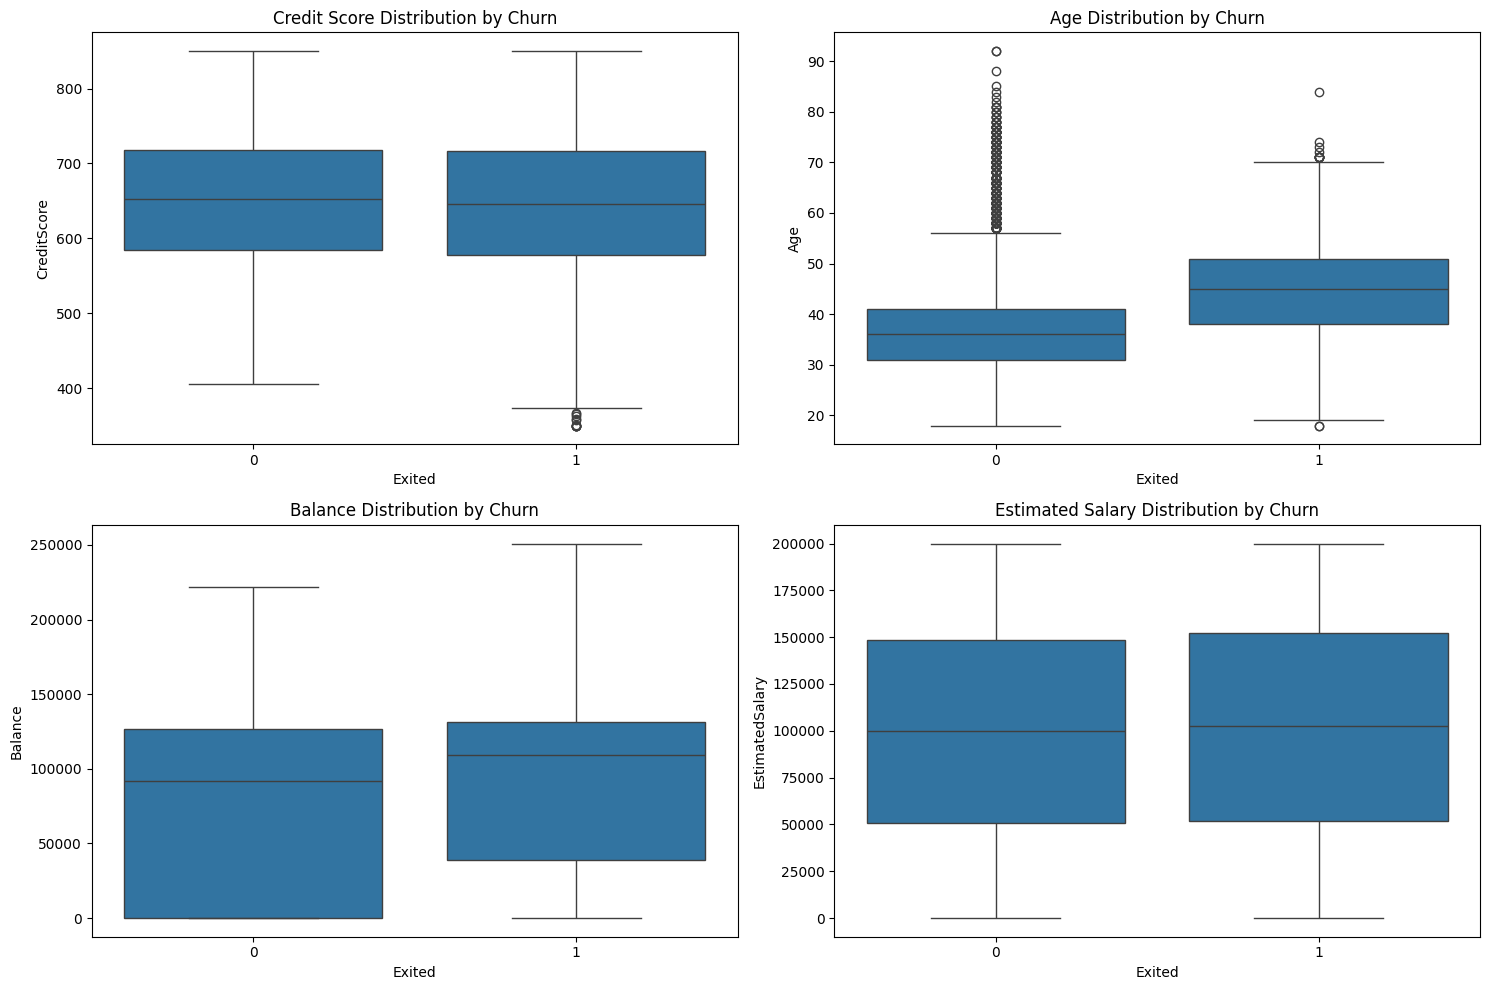

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Credit Score vs. Churn
sns.boxplot(x='Exited', y='CreditScore', data=c_data, ax=axes[0, 0])
axes[0, 0].set_title('Credit Score Distribution by Churn')

# Age vs. Churn
sns.boxplot(x='Exited', y='Age', data=c_data, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Churn')

# Balance vs. Churn
sns.boxplot(x='Exited', y='Balance', data=c_data, ax=axes[1, 0])
axes[1, 0].set_title('Balance Distribution by Churn')

# Estimated Salary vs. Churn
sns.boxplot(x='Exited', y='EstimatedSalary', data=c_data, ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary Distribution by Churn')

plt.tight_layout()
plt.show()


**Credit Score Distribution by Churn**: Churned customers have slightly lower credit scores with more outliers on the lower end.

**Age Distribution by Churn**: Older customers are more likely to churn compared to younger ones.

**Balance Distribution by Churn**: Customers with higher balances tend to stay, but the range is wide for both groups.

**Estimated Salary Distribution by Churn**: Salary levels show no clear relationship with churn behavior.

# Data Processing

In [15]:
c_data.isnull().sum() # Count null values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


In [16]:
# Drop null values
c_data.dropna(subset=['Geography'], inplace=True)
c_data.dropna(subset=['Age'], inplace=True)
c_data.dropna(subset=['HasCrCard'], inplace=True)
c_data.dropna(subset=['IsActiveMember'], inplace=True)

In [17]:
c_data['CustomerId'].nunique()

9996

In [18]:
c_data['Surname'].nunique()

2932

In [19]:
# Drop irrelevant coulmns as they don't contribute to valuble info
c_data.drop('RowNumber',axis=1,inplace=True)
c_data.drop('CustomerId',axis=1,inplace=True)

In [20]:
c_data.drop('Surname',axis=1,inplace=True)

<Axes: >

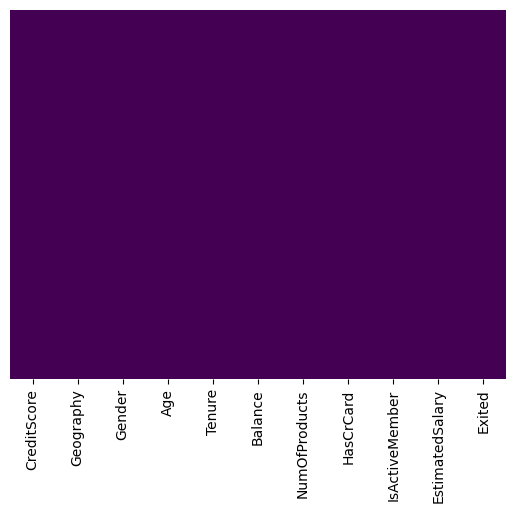

In [21]:
sns.heatmap(c_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')  # Heatmap to verify no null values

In [22]:
c_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
# Lable encode class based columns for easy use with models
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

c_data['Gender']= label_encoder.fit_transform(c_data['Gender'])

c_data['Gender'].unique()

array([0, 1])

In [24]:
c_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [25]:
c_data['Geography']= label_encoder.fit_transform(c_data['Geography'])
c_data['Geography'].unique()

array([0, 2, 1])

In [26]:
c_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [27]:
c_data.corr() # Correlation table to identify positive or negative relations with target variable.

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007537,-0.002730,-0.004233,0.000779,0.006580,0.012412,-0.005795,0.025125,-0.001256,-0.026790
Geography,0.007537,1.000000,0.005260,0.022908,0.003844,0.069304,0.004282,-0.008685,0.006903,-0.001446,0.035990
Gender,-0.002730,0.005260,1.000000,-0.027399,0.014661,0.012010,-0.021853,0.005850,0.022408,-0.007819,-0.106186
Age,-0.004233,0.022908,-0.027399,1.000000,-0.010116,0.028376,-0.030762,-0.011716,0.085485,-0.006939,0.285448
Tenure,0.000779,0.003844,0.014661,-0.010116,1.000000,-0.011986,0.013205,0.022557,-0.028090,0.007835,-0.014208
Balance,0.006580,0.069304,0.012010,0.028376,-0.011986,1.000000,-0.304163,-0.014678,-0.010323,0.012637,0.118564
NumOfProducts,0.012412,0.004282,-0.021853,-0.030762,0.013205,-0.304163,1.000000,0.003368,0.009644,0.014378,-0.047621
HasCrCard,-0.005795,-0.008685,0.005850,-0.011716,0.022557,-0.014678,0.003368,1.000000,-0.012039,-0.009924,-0.007023
IsActiveMember,0.025125,0.006903,0.022408,0.085485,-0.028090,-0.010323,0.009644,-0.012039,1.000000,-0.011022,-0.156072
EstimatedSalary,-0.001256,-0.001446,-0.007819,-0.006939,0.007835,0.012637,0.014378,-0.009924,-0.011022,1.000000,0.011981


# Prediction

In [28]:
# Choose the features to train on and the target variable
X = c_data[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = c_data['Exited']

In [29]:
# Handle the class imbalances by applyimg SMOTE to create synthetic instances for minority class
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


In [30]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,f1_score,mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [31]:
# Split the data for training and testing once model is built
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rfpred)
print("Random Forest Accuracy:", rf_acc)

#Decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dtpred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dtpred)
print("Decision Tree accuracy:", dt_acc)

#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

#Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

Random Forest Accuracy: 0.8932160804020101
Decision Tree accuracy: 0.8319723618090452
Logistic Regression Accuracy: 0.7418341708542714
Naive Bayes Accuracy: 0.7295854271356784


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Here we see that Random Forest is a comapartively better model with higher accuracy compared to other models applied.**

In [33]:
# To display model performace, recall and precision
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1600
           1       0.91      0.87      0.89      1584

    accuracy                           0.89      3184
   macro avg       0.89      0.89      0.89      3184
weighted avg       0.89      0.89      0.89      3184



In [34]:
from sklearn.model_selection import cross_val_score, KFold # To verfy results are consistent using k-fold cross validation

In [35]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_results = cross_val_score(rf, X, y, cv=kf)

n_splits_values: This list contains the different n_splits you want to test (e.g., 5, 10, 15, etc.).

Loop: You loop through each value of n_splits, perform cross-validation with KFold, and store the mean score of the cross-validation results.

Evaluation: After running the cross-validation for each n_splits, you calculate the mean score (e.g., accuracy) and identify the best value of n_splits based on the highest mean score.


In [36]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')

Cross-Validation Results (Accuracy): [0.88630653 0.8919598  0.89258794 0.8919598  0.89384422 0.875
 0.90201005 0.8919598  0.90389447 0.89886935]


In [37]:
mean = np.mean(cross_val_results)
mean

0.8928391959798996

#Segmentation

In [38]:
c_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [39]:
# To produce customer segments we cluster them together and label cluster churn risk in comparison to mean people who churn in the cluster

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler_cluster = StandardScaler()
X_scaled = scaler_cluster.fit_transform(c_data.drop(columns=['Exited']))

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
c_data['RiskCluster'] = kmeans.fit_predict(X_scaled)

# Map clusters to risk levels (manual inspection may be needed)
cluster_map = {0: 'Moderate Risk', 1: 'High Risk', 2: 'Low Risk'}
c_data['RiskLevel'] = c_data['RiskCluster'].map(cluster_map)

# Analyze cluster distribution
print(c_data.groupby('RiskLevel')['Exited'].mean())  # Churn rates in each cluster


RiskLevel
High Risk        0.262158
Low Risk         0.144152
Moderate Risk    0.154615
Name: Exited, dtype: float64


In [ ]:
# c_data.drop('RiskCluster',axis=1,inplace=True)
# c_data.drop('RiskLevel',axis=1,inplace=True)

In [40]:
# Print the centroids (mean values of features for each cluster)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(centroids)
# This is to derive understanding of feature relation withing the clsuter to obtain cluster characteristics

   CreditScore  Geography    Gender       Age    Tenure   Balance  \
0     0.042041   0.090812  0.047451  0.075287 -0.065414  0.733561   
1    -0.026648  -0.007573 -0.019064 -0.093711  0.032175  0.024862   
2     0.000744  -0.106689 -0.023019  0.100969  0.018963 -1.048199   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0      -0.406171  -0.024529        0.970820        -0.007729  
1      -0.046190   0.012577       -1.030057         0.011411  
2       0.650630   0.006002        0.915617        -0.014244  


####Interpretation for Cluster 0 (Moderate Risk):

These customers are engaged with the bank (high activity), but they have fewer products. They have high account balances but tend not to use many banking services. This could suggest that they may not be fully utilizing the bank’s offerings, and they are somewhat at risk of leaving due to underutilization.

####Interpretation for Cluster 1 (High Risk):

These customers are inactive and have low balances, which puts them at a high risk of churning. They are also likely using fewer services and have lower credit scores, making them more vulnerable to leaving the bank. Their lack of engagement could be an early sign of dissatisfaction or a risk factor for churn.

####Interpretation for Cluster 2 (Low Risk):

These customers have high engagement (active members), use many products, but have low balances and low salaries. Despite having lower balances, their active participation and diverse use of banking products suggest they are likely to stay with the bank, as they are more deeply integrated into the bank’s services.

By identifying these customer characteristics and understanding why they may or may not churn, the bank can build its marketing strategies to increase engagement and reduce churn in each cluster.

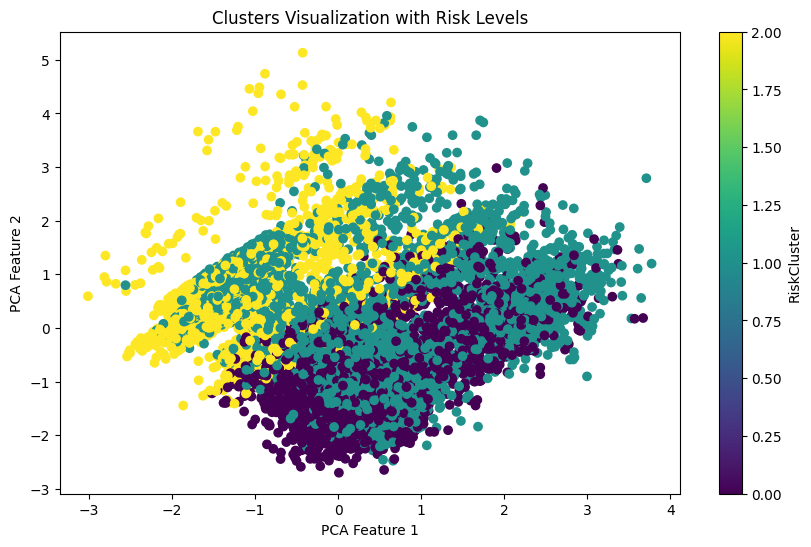

In [41]:
# Use PCA to display different cluster groups in 2D with reductions to 2 features

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Drop the 'RiskCluster' and 'RiskLevel' columns before scaling
X_cleaned = c_data.drop(columns=['RiskCluster', 'RiskLevel'])

# Scale the cleaned DataFrame (X_cleaned)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=c_data['RiskCluster'], cmap='viridis')
plt.title("Clusters Visualization with Risk Levels")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.colorbar(label="RiskCluster")
plt.show()


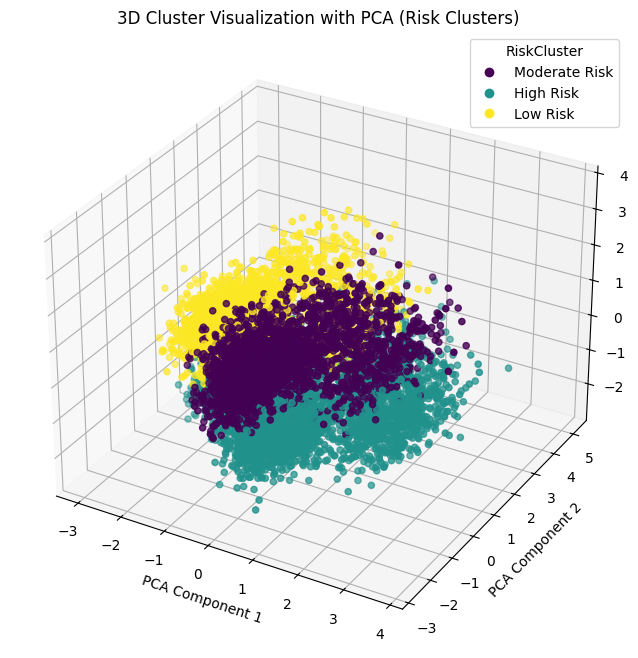

In [42]:
# Since 2D doesn't clearly show differentiation we try the 3D display using PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Clean the data by removing non-feature columns ('RiskCluster' and 'RiskLevel')
X_cleaned = c_data.drop(columns=['RiskCluster', 'RiskLevel'])

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Step 3: Apply PCA to reduce to 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create a 3D scatter plot to visualize the clusters based on 'RiskCluster'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot where the color corresponds to the 'RiskCluster'
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=c_data['RiskCluster'], cmap='viridis')

# Set the labels for the axes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add the legend to the plot (based on 'RiskCluster')
handles, labels = scatter.legend_elements()
ax.legend(handles, ['Moderate Risk', 'High Risk', 'Low Risk'], title="RiskCluster", loc='upper right')

# Show the plot
plt.title("3D Cluster Visualization with PCA (Risk Clusters)")
plt.show()


# Streamlit App file

In [43]:
import pickle
pickle.dump(rf,open('churnpred_rf.pkl','wb'))
pickle.dump(scaler_cluster, open('scaler.pkl', 'wb'))
pickle.dump(kmeans, open('clustering.pkl', 'wb'))